# Investigating Trends in Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I will investigate the TMDb movie dataset to try and identify any trends that exist between table attributes. Specifically, I will focus on the attribute `vote_average` to see if there is any correlation between this attribute and any of the other columns. I would like to know if there is a correlation between the financial columns of `budget_adj` and `revenue_adj`, and how well a movie scores in the `vote_average` field. I will also compare the `vote_average` score and the TMDb attribute `popularity` to see if these two columns are predictive of one another. Finally, I will investigate a dataset consisting of the top 10% of the `vote_average` column to see what type of attributes are associated with movies that are in this 'A' grade grouping.


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<a id='wrangling'></a>
## Data Wrangling




### General Properties

In [2]:
# Load data from file into a dataframe
filename = 'C:/Users/securitycontrol/My Documents/WGU/C749/Project 1/tmdb-movies.csv'
all_movies_df = pd.read_csv(filename)

In [3]:
## preview the table
all_movies_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
## preview the table
all_movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The two above cells give a preview of the type of data that is in each column in the dataset. We can see we are going to have several columns that have values of 0 in columns like `budget`, `revenue`, `runtime`, `budget_adj`, and `revenue_adj`. A lack of values in these columns will have an impact on any trends and calculations that involve rows with those values. My investigation is also focusing on `vote_average`, which is related to `vote_count`. We can see that some of the records in this dataset have as few as 10 votes counting towards the `vote_average` score. In order to have more statsitical significance, I would like to have a minimum of 100 people who voted for each movie, to include that movie in my analysis.

In [5]:
## get a count of how many rows have a 0 in the adjusted budget column
len(all_movies_df[all_movies_df['budget_adj']==0])

5696

In [6]:
## get a count of how many rows have a 0 in the adjusted revenue column
len(all_movies_df[all_movies_df['revenue_adj']==0])

6016

In [7]:
## check to see if any duplicate rows exist in the DataFrame
all_movies_df[all_movies_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/2010,110,5.0,2010,30000000.0,967000.0


The previous few cells took a closer look at the data within the dataset to see if any abnormalities could be located. Since I intend to work with the financial columns `budget_adj` and `revenue_adj`, I thought it would be beneficial to check for invalid entries, such as rows without any finacial data. I also checked the dataset for any duplicate rows and found that one row was in fact a duplicate row in the dataset and will need to be removed.

In [8]:
## check the data types and non null column count
all_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The above cell looks at the content of the dataframe to show us the column names, data types, and the count of non-null columns. We can see that columns such as `homepage` have nearly 8000 rows with null values. My analysis does not rely on most of these columns so they will be removed from my refined dataset. The following cells will take a look at a few rows in the dataset to help illustrate this information. 

In [9]:
## view the dataframe sorted by the homepage column with NaNs first
all_movies_df.sort_values(by='homepage', ascending=False, na_position='first').head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
18,150689,tt1661199,5.556818,95000000,542351353,Cinderella,Lily James|Cate Blanchett|Richard Madden|Helen...,NaN,Kenneth Branagh,Midnight is just the beginning.,...,"When her father unexpectedly passes away, youn...",112,Romance|Fantasy|Family|Drama,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,3/12/2015,1495,6.8,2015,87399961.54,4.989630e+08
21,307081,tt1798684,5.337064,30000000,91709827,Southpaw,Jake Gyllenhaal|Rachel McAdams|Forest Whitaker...,NaN,Antoine Fuqua,Believe in Hope.,...,"Billy ""The Great"" Hope, the reigning junior mi...",123,Action|Drama,Escape Artists|Riche-Ludwig Productions,6/15/2015,1386,7.3,2015,27599987.86,8.437300e+07
26,214756,tt2637276,4.564549,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,NaN,Seth MacFarlane,"Ted is Coming, Again.",...,Newlywed couple Ted and Tami-Lynn want to have...,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,6/25/2015,1666,6.3,2015,62559972.47,1.985944e+08
32,254470,tt2848292,3.877764,29000000,287506194,Pitch Perfect 2,Anna Kendrick|Rebel Wilson|Hailee Steinfeld|Br...,NaN,Elizabeth Banks,We're back pitches,...,"The Bellas are back, and they are better than ...",115,Comedy|Music,Universal Pictures|Gold Circle Films|Brownston...,5/7/2015,1264,6.8,2015,26679988.26,2.645056e+08
33,296098,tt3682448,3.648210,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,NaN,Steven Spielberg,"In the shadow of war, one man showed the world...",...,"During the Cold War, the Soviet Union captures...",141,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,10/15/2015,1638,7.1,2015,36799983.81,1.496016e+08


The above cell looks at the first 5 rows that are sorted by `homepage`, in descending order, with NaN (null) values listed first. 

In [10]:
## view the dataframe sorted by the tagline column with NaNs first
all_movies_df.sort_values(by='tagline', ascending=False, na_position='first').head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
42,321697,tt2080374,3.079522,30000000,34441873,Steve Jobs,Michael Fassbender|Kate Winslet|Seth Rogen|Kat...,http://www.stevejobsthefilm.com,Danny Boyle,NaN,...,Set backstage at three iconic product launches...,122,History|Drama,Universal Pictures|Scott Rudin Productions|Leg...,10/9/2015,1035,6.9,2015,27599987.86,3.168651e+07
53,274479,tt2446980,2.793297,60000000,101134059,Joy,Jennifer Lawrence|Bradley Cooper|Robert De Nir...,http://www.foxmovies.com/movies/joy,David O. Russell,NaN,...,A story based on the life of a struggling Long...,124,Comedy|Drama,Fox 2000 Pictures|Davis Entertainment|Annapurn...,12/24/2015,1001,6.4,2015,55199975.71,9.304329e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/2015,81,5.5,2015,0.00,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/2015,27,5.1,2015,0.00,0.000000e+00
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/2015,11,5.4,2015,0.00,0.000000e+00


The previous cell also looked at 5 rows from our data set, but this time organized by `tagline` with NaN values listed first. 



### Data Cleaning - Removing duplicates, rows/columns with 0 or NaN values, and less than 100 voters

In [11]:
## Drop any columns that are not relevant to analysis
all_movies_df = all_movies_df.drop(columns=['imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'release_date', 'release_year'])

In [12]:
## Preview the dataframe
all_movies_df.head(5)

,id,popularity,original_title,runtime,vote_count,vote_average,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,5562,6.5,137999939.3,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,6185,7.1,137999939.3,3.481613e+08
2,262500,13.112507,Insurgent,119,2480,6.3,101199955.5,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,5292,7.5,183999919.0,1.902723e+09
4,168259,9.335014,Furious 7,137,2947,7.3,174799923.1,1.385749e+09


The first of the previous two cells removed all of the columns from the dataset that are not relevant for my investigation. I have choosen to keep the `id` and `original_title` columns becase they are identifiers useful for showing what the row represents. The cell directly above shows the contents of our dataset with columns removed.

In [13]:
## removes any duplicate rows in the DataFrame
movies_df = all_movies_df.drop_duplicates(keep='first')

The cell above created a new DataFrame from the existing one and only kept the first instance of a duplicate row. So we now have refined our DataFrame to only include unique row entries.

In [14]:
## removes any records with 0 for budget_adj or revenue_adj, or those records with less than 100 votes in vote_count
bad_data = (movies_df[(movies_df['budget_adj']==0) | (movies_df['revenue_adj']==0) | (movies_df['vote_count'] < 100)])
print (len(bad_data))

8257


The above cell used our new DataFrame, `movies_df`, to create another DataFrame called `bad_data`. This set of bad data includes any row from our dataset that has a 0 value for `budget_adj` or `revenue_adj`. It also includes any row that has a `vote_count` of less than 100 people. There are 8257 rows that meet these 3 criteria.

In [15]:
## Creates a new DataFrame by removing the entries that are also in the bad_data series
cleaned_movies_df = movies_df.append(bad_data).drop_duplicates(keep=False)  
len(cleaned_movies_df)

2608

The above cell creates a DataFrame that has been cleaned up to exclude any rows that are in the `bad_data` DataFrame. It takes the `movies_df` and appends all the records from the `bad_data` dataframe. Since the `bad_data` dataframe is based on the `movies_df`, it will include duplicates because the records would exist in both tables. I chose to keep none of these duplicates and the resulting dataframe is now cleaned and ready to use. This dataframe has 2608 rows.

In [16]:
## preview our cleaned dataset
cleaned_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 0 to 10770
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2608 non-null   int64  
 1   popularity      2608 non-null   float64
 2   original_title  2608 non-null   object 
 3   runtime         2608 non-null   int64  
 4   vote_count      2608 non-null   int64  
 5   vote_average    2608 non-null   float64
 6   budget_adj      2608 non-null   float64
 7   revenue_adj     2608 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 183.4+ KB


The above cell shows that we now have 8 columns that all contain non-null data that we can use for our investigation. The following cell will give a preview of what is now in the dataset.

In [17]:
## preview the contents of our cleaned dataset
cleaned_movies_df.head(5)

,id,popularity,original_title,runtime,vote_count,vote_average,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,5562,6.5,137999939.3,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,6185,7.1,137999939.3,3.481613e+08
2,262500,13.112507,Insurgent,119,2480,6.3,101199955.5,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,5292,7.5,183999919.0,1.902723e+09
4,168259,9.335014,Furious 7,137,2947,7.3,174799923.1,1.385749e+09


In [18]:
## takes a panda series and returns a series with outliers removed
def find_outliers(data):
    q1 = data.quantile(.25)
    q3 = data.quantile(.75)
    iqr = q3 - q1
    lower_range = q1 - (1.5 * iqr)
    higher_range = q3 + (1.5 * iqr)
    
    my_list = data.tolist()
    
    useful_data = []
    for i in range(len(my_list)):
        if (my_list[i] >= lower_range) & (my_list[i] <= higher_range):
            useful_data.append(my_list[i])
           
    my_series = pd.Series(useful_data)
    return my_series

The above function was created to remove outliers from a dataset. This will remove values from both the high and low extremes. We will use this function later in my analysis.

<a id='eda'></a>
## Exploratory Data Analysis






### What relationships exists between a movie's vote average score and other table properties?

#### Does having a higher budget correlate to a better vote average score?

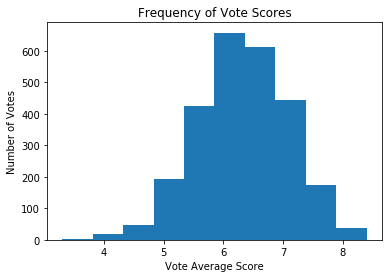

In [19]:
## plot a histogram
plt.hist(cleaned_movies_df['vote_average'], bins=10)
plt.xlabel('Vote Average Score')
plt.ylabel('Number of Votes')
plt.title('Frequency of Vote Scores')
plt.show()

In [20]:
cleaned_movies_df['vote_average'].mode()

0    6.5
dtype: float64

I wanted to start by viewing the distribution of `vote_average` scores that we have in our dataset. The previous cell shows the frequency of each `vote_score`. The mode of this set was determined in the cell above to be 6.5 and this can be seen in our histogram with the majority of votes falling in the 6-7 range. Next I will start looking at the relationship between variables.

In [21]:
## establish an independent variable, x, to represent the vote_average values
x = cleaned_movies_df['vote_average']

In [22]:
## define an dependent variable to contain the budget_adj values
y = cleaned_movies_df['budget_adj']

In [23]:
## Calculate Pearson's R, the correlation coefficient
np.corrcoef(x,y)[0,1]

-0.03821466752418816

Text(0.5, 1.0, 'Vote Average Versus Budget')

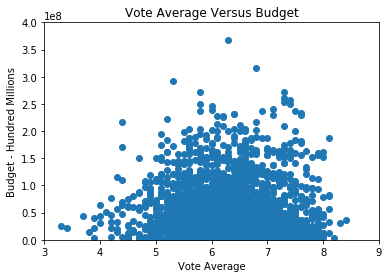

In [24]:
plt.scatter(x,y)
plt.ylabel('Budget - Hundred Millions')
plt.xlabel('Vote Average')
plt.axis([3, 9, 0, 400000000])
plt.title('Vote Average Versus Budget')

The above cells calculated Pearson's R, the correlation coefficient, between scores in the `vote_average` column and their corresponding expenses from the `budget_adj` column. A coefficient of -0.0382 is indicative of practically no correlation between the two attributes. Therefore, increasing the amount of money that is spent on a movie has no correlation with how well that movie will be liked by the general population. 

#### Does earning more revenue correlate to a better vote average score?

In [25]:
## redefine y to be the revenue_adj column
y = cleaned_movies_df['revenue_adj']

In [26]:
## Calculate Pearson's R, the correlation coefficient
np.corrcoef(x,y)[0,1]

0.23135541337120782

Text(0.5, 1.0, 'Vote Average Versus Revenue Earned')

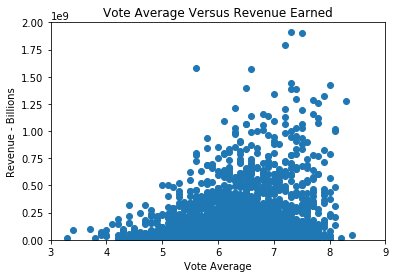

In [27]:
plt.scatter(x,y)
plt.ylabel('Revenue - Billions')
plt.xlabel('Vote Average')
plt.axis([3, 9, 0, 2000000000])
plt.title('Vote Average Versus Revenue Earned')

The above cells calculated the correlation coeffient between the `vote_average` column and the `revenue_adj` column. There is a small positive correlation of 0.231 between the two attributes. I expected the relationship to be stronger since it would logically makes sense for a more popular movie to earn more money. 

#### Does a movies popularity score correlate to a similar vote_average score?

In [28]:
## redefine y to be the popularity column
y = cleaned_movies_df['popularity']

In [29]:
## Calculate Pearson's R, the correlation coefficient
np.corrcoef(x,y)[0,1]

0.3064894733733035

Text(0.5, 1.0, 'Vote Average Versus Popularity Score')

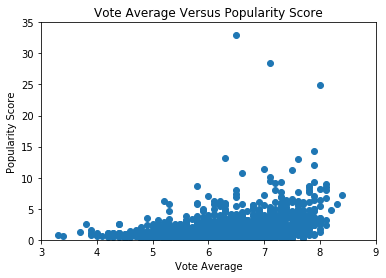

In [30]:
## plot a scatterplot
plt.scatter(x,y)
plt.ylabel('Popularity Score')
plt.xlabel('Vote Average')
plt.axis([3, 9, 0, 35])
plt.title('Vote Average Versus Popularity Score')

The above cells looked at the relationship between `vote_average` and `popularity`. A correlation score of 0.306 shows their is a medium correlation between the two variables. The scatterplot also shows there is a slightly positive relationship trend. 

### What trends exist for movies that are 'A' rated?

In [31]:
## remove any outliers from the runtime column
runtime_minus_outliers = find_outliers(movies_df['runtime'])

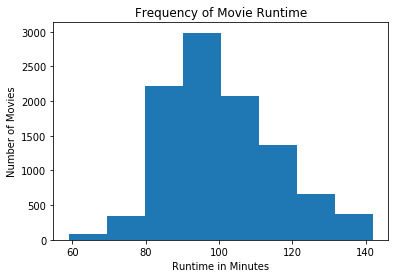

In [32]:
## plot a histogram
plt.hist(runtime_minus_outliers, bins=8)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Number of Movies')
plt.title('Frequency of Movie Runtime')
plt.show()

The above cells created a new Panda Series that held the values from the runtime column once outliers had been removed from the data set. I used the DataFrame - `movies_df`, that I created earlier, which had removed one duplicate row from the original dataframe. We now have a larger sample of 10865 to use in our results. This is then plotted on a histogram to show the frequency of movies at a certain time length. The most common length being between 90 and 100 minutes. Next I will refine this set to include only `vote_average` scores with 100 or more voters in the `vote_count` column.

In [33]:
## create a dataframe where all movies have at least 100 votes 
vote_count_df = movies_df[movies_df['vote_count']>=100]

In [34]:
## create a DataFrame to hold the A list movies
top_10_perc_by_vote_average=vote_count_df[vote_count_df['vote_average'] >= vote_count_df['vote_average'].quantile(.9)]

I created a `vote_count_df` from our existing dataset to include only those rows with at least 100 people that voted for the movie average score. From this newly created dataset, I then created a `top_10_perc_by_vote_average` dataset that holds all records for movies that are above the 90th percentile; the top 10 % of movies, or an 'A' rated movies set.

In [35]:
##describe this variable
top_10_perc_by_vote_average.describe()

,id,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,373.000000,373.000000,373.000000,373.000000,373.000000,3.730000e+02,3.730000e+02
mean,62506.123324,2.495170,117.726542,1480.882038,7.561930,4.290360e+07,2.500282e+08
std,96667.654995,2.566219,52.348966,1635.556484,0.236003,5.557902e+07,3.839447e+08
min,11.000000,0.028875,3.000000,101.000000,7.300000,0.000000e+00,0.000000e+00
25%,650.000000,0.814857,99.000000,272.000000,7.300000,4.741411e+06,9.920174e+06
50%,9800.000000,1.650848,118.000000,804.000000,7.500000,2.152877e+07,8.974845e+07
75%,90369.000000,3.425628,135.000000,2131.000000,7.700000,5.526546e+07,3.192639e+08
max,355338.000000,24.949134,705.000000,9767.000000,8.400000,2.716921e+08,2.789712e+09


The resulting set above shows some general information about this 'A' list of movies. We can see that we have 373 rows in our dataset and that the average runtime for movies in this 'A' group is 117.73 minutes. 

In [36]:
##Create a Series to hold runtime data minus outliers
A_list_outliers = find_outliers(top_10_perc_by_vote_average['runtime'])

In [37]:
## describe the variables
A_list_outliers.describe()

count    342.000000
mean     120.286550
std       23.629838
min       75.000000
25%      102.000000
50%      120.000000
75%      135.000000
max      189.000000
dtype: float64

I then used the `find_outliers` function to remove outliers from our A list set to further refine the dataset. The average movie length in this group is about 120 minutes.

In [38]:
## fine the mode of this dataset
A_list_outliers.mode()

0    117
dtype: int64

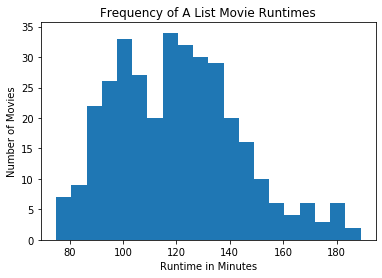

In [39]:
## plot a histogram
plt.hist(A_list_outliers, bins=20)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Number of Movies')
plt.title('Frequency of A List Movie Runtimes')
plt.show()


The above cell is a visual representation of the 'A' list movies runtime frequencies. The mode was calculated in one of the above cells to be at 117 minutes and the histogram shows there is approximately 33 movies within the span of 117-122 minutes in length. 

<a id='conclusions'></a>
## Conclusions

### Limitations

>Some of the issues I encountered while working with this dataset involved a significant chunk of missing data values in the budgetary columns. Approximately two-thirds of the dataset had a value of 0 in the `budget_adj` and/or `revenue_adj` columns so this limited my sample set significantly. I still believe the sample of 2608 that I used for much of my analysis was adequate for the calculation of my results. 

>Another limitiation that I worked around was not understanding how the column `popularity` was determined. I decided to use the `average_vote` column because it was a simple rating from 1-10 for each movie that was then averaged among the sample of voters. It was unclear how `popularity` was calcuated or what factors went into determining the ratings. I simply chose to investigate the relationship between `popularity` and `average_score` without being able to dive much further into it.

### Summarizing Results
>My investigation has lead me to believe that there is no correlation between `vote_average` score and any of the financial attributes in our dataset. We see nearly a 0 correlation between `vote_average` scores and the `budget_adj` column's dollars budgeted for the movie. It leads me to conclude that a good movie cannot be bought by having more money spent in its production. 

>When we compare the `vote_average` scores to the `revenue_adj` column we see a low correlation of 0.231. I expected it to be higher, but I am not surprised of the low correlation. One would expect a movie that had a high revenue to actually be popular, because it would mean people paid to see it. This low correlation shows that to a small extent this is true, but a direct conclusion cannot be made. A movie can have a lot of hype from advertisement, but still not be very popular, even if a high number of people paid to see it.

>The correlation between `popularity` and `vote_average` was 0.306, which means there is a medium correlation between the two attributes. We do not know what goes into calculating the IMDb `popularity` attribute, but the relationship between the two is not surprising. A movie that is well liked should have both a high `'vote_average` score and `popularity` score. Obviously this is only a medium strength correlation so there has to be some unknown variables that go into calculating the `popularity` score, but it is good to at least see a medium correlation between two variables that measure similar concepts.

>The most interesting part of my investigation involved our group of 'A' list movies. Refining the data down to the top 10% showed some interesting statistics about the group of movies that scored an A. I have always felt the perfect length of movie is about 120 minutes, and it is interesting to see that happens to hold true in our dataset. However, making a movie 120 minutes in length will not have any affect on how popular it is.
